# Clustering Mall Customers

**Importing the required libraries & packages**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
import ydata_profiling as pf
%matplotlib inline
from scipy.cluster.hierarchy import dendrogram,linkage
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import warnings
warnings.filterwarnings('ignore')
import pickle
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=(20,10)

**Changing The Default Working Directory Path & Reading the Dataset using Pandas Command**

In [2]:
os.chdir('C:\\Users\\Shridhar\\OneDrive\\Desktop\\Top Mentor\\Batch 74 Day 18')
df=pd.read_csv('Mall_Customers.csv')


**Automated Exploratory Data Analysis (EDA) with ydata_profiling(pandas_profiling)**

In [3]:
pf.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

**Checking the Null values of all the columns in the dataset.**

In [4]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

**Assigning the independent variable since it is Clustering Model there's no dependent variable.**

In [5]:
x=df.iloc[:,[3,4]].values

**Finding the WCSS (Within Cluster Sum of Square) values using KMeans Clustering Model**

In [6]:
wcss=[]
for i in range(2,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
display(wcss)

[181363.59595959593,
 106348.37306211118,
 73679.78903948836,
 44448.45544793371,
 37265.86520484347,
 31280.903845940935,
 25022.48500453035,
 21829.135638779822,
 19894.977606177952]

**Plotting the Line Graph with WCSS Values to get the exact ideal number of clusters to be created using KMeans Clustering Algorithm and saving the PNG file of the graph.**

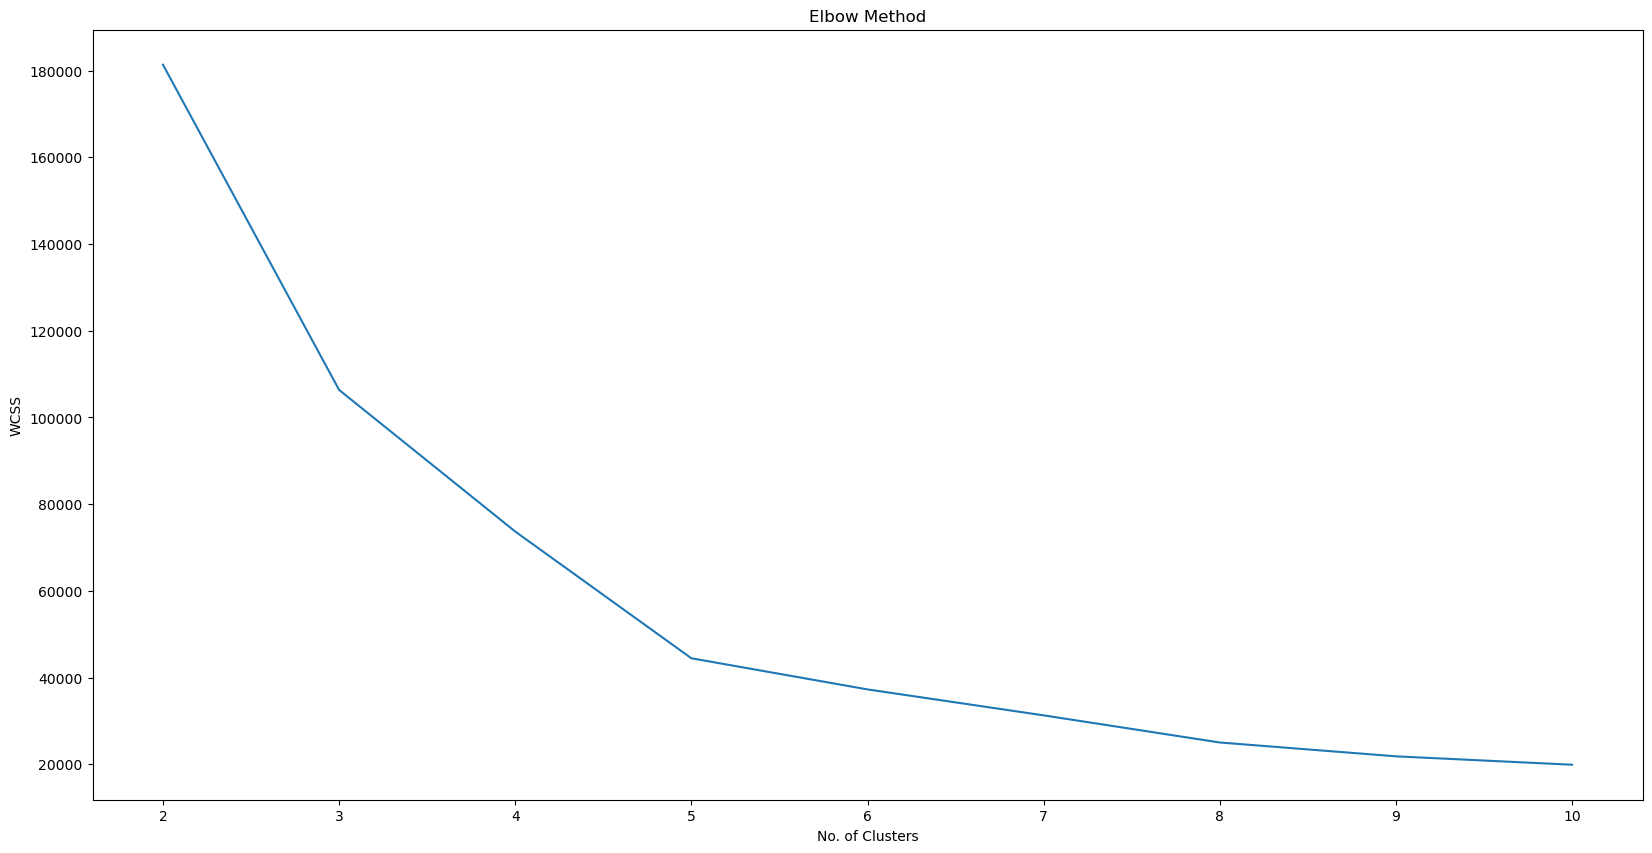

In [7]:
plt.plot(range(2,11),wcss)
plt.title('Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.savefig('Elbow Method Graph.png')
plt.show()

**Fitting the KMeans Clustering model with ideal number of clusters found from Elbow Method Graph and getting the dataset belonging to the Cluster.**

In [8]:
kmeans=KMeans(n_clusters=5)
kmeans.fit(x)
y_kmeans=kmeans.labels_
display(y_kmeans)

array([2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 4,
       2, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 1, 3, 4, 3, 1, 3, 1, 3,
       4, 3, 1, 3, 1, 3, 1, 3, 1, 3, 4, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3])

**Plotting the Scatter Plot Graph with the independent variable and the Cluster which it belongs and saving the PNG file.**

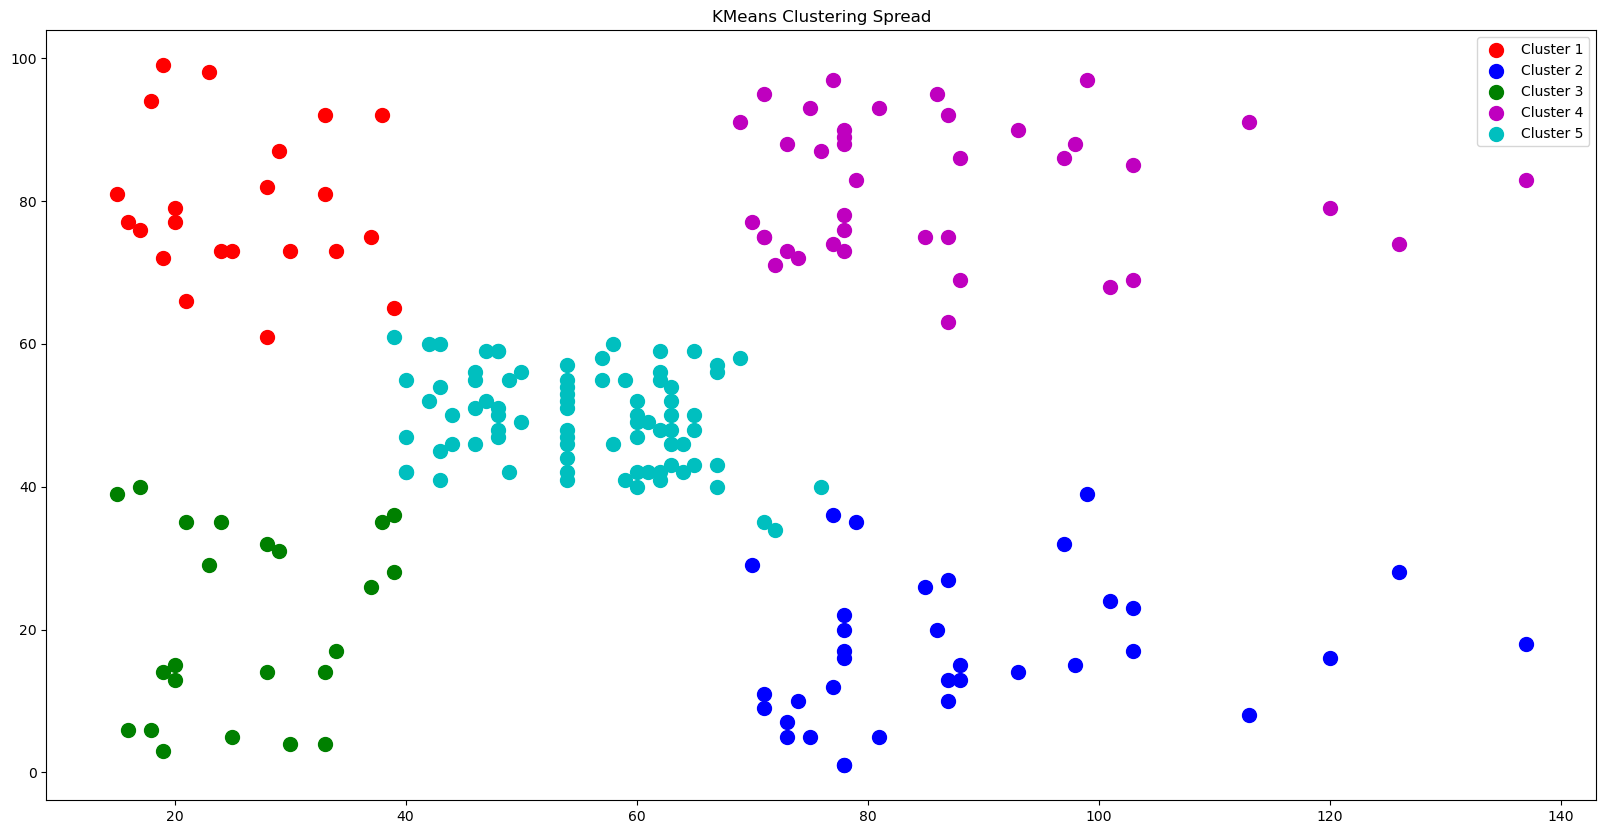

In [9]:
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],c='r',s=100,label='Cluster 1')
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],c='b',s=100,label='Cluster 2')
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],c='g',s=100,label='Cluster 3')
plt.scatter(x[y_kmeans==3,0],x[y_kmeans==3,1],c='m',s=100,label='Cluster 4')
plt.scatter(x[y_kmeans==4,0],x[y_kmeans==4,1],c='c',s=100,label='Cluster 5')
plt.title('KMeans Clustering Spread')
plt.savefig('Kmeans Clustering Spread Graph.png')
plt.legend()
plt.show()

**Merging the Cluster Number and adding the sepearte column for it with Original Dataset and displaying the resulting dataset**

In [10]:
result=pd.concat([df,pd.DataFrame(y_kmeans,columns=['Cluster Number'])],axis=1)
display(result)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster Number
0,1,Male,19,15,39,2
1,2,Male,21,15,81,0
2,3,Female,20,16,6,2
3,4,Female,23,16,77,0
4,5,Female,31,17,40,2
...,...,...,...,...,...,...
195,196,Female,35,120,79,3
196,197,Female,45,126,28,1
197,198,Male,32,126,74,3
198,199,Male,32,137,18,1


**Grouping By The Cluster Number to see the number of values in each Clusters**

In [11]:
result.groupby('Cluster Number').size()

Cluster Number
0    22
1    35
2    23
3    39
4    81
dtype: int64

**Grouping by the Cluster Number with respect to Annual Income and Spending Score to get the Minimum, Maximum values of Annual Income and Spending Score for each Clusters.**

In [12]:
result.groupby('Cluster Number').agg({'Annual Income (k$)':[np.min,np.max],'Spending Score (1-100)':[np.min,np.max]})

Annual Income (k$)      Spending Score (1-100)     
                             amin amax                   amin amax
Cluster Number                                                    
0                              15   39                     61   99
1                              70  137                      1   39
2                              15   39                      3   40
3                              69  137                     63   97
4                              39   76                     34   61

**Plotting the Dendrogram Graph using Ward Method to find out the exact ideal number of clusters to be created using Agglomerative Clustering Model with Ward Linkage and saving the PNG file**

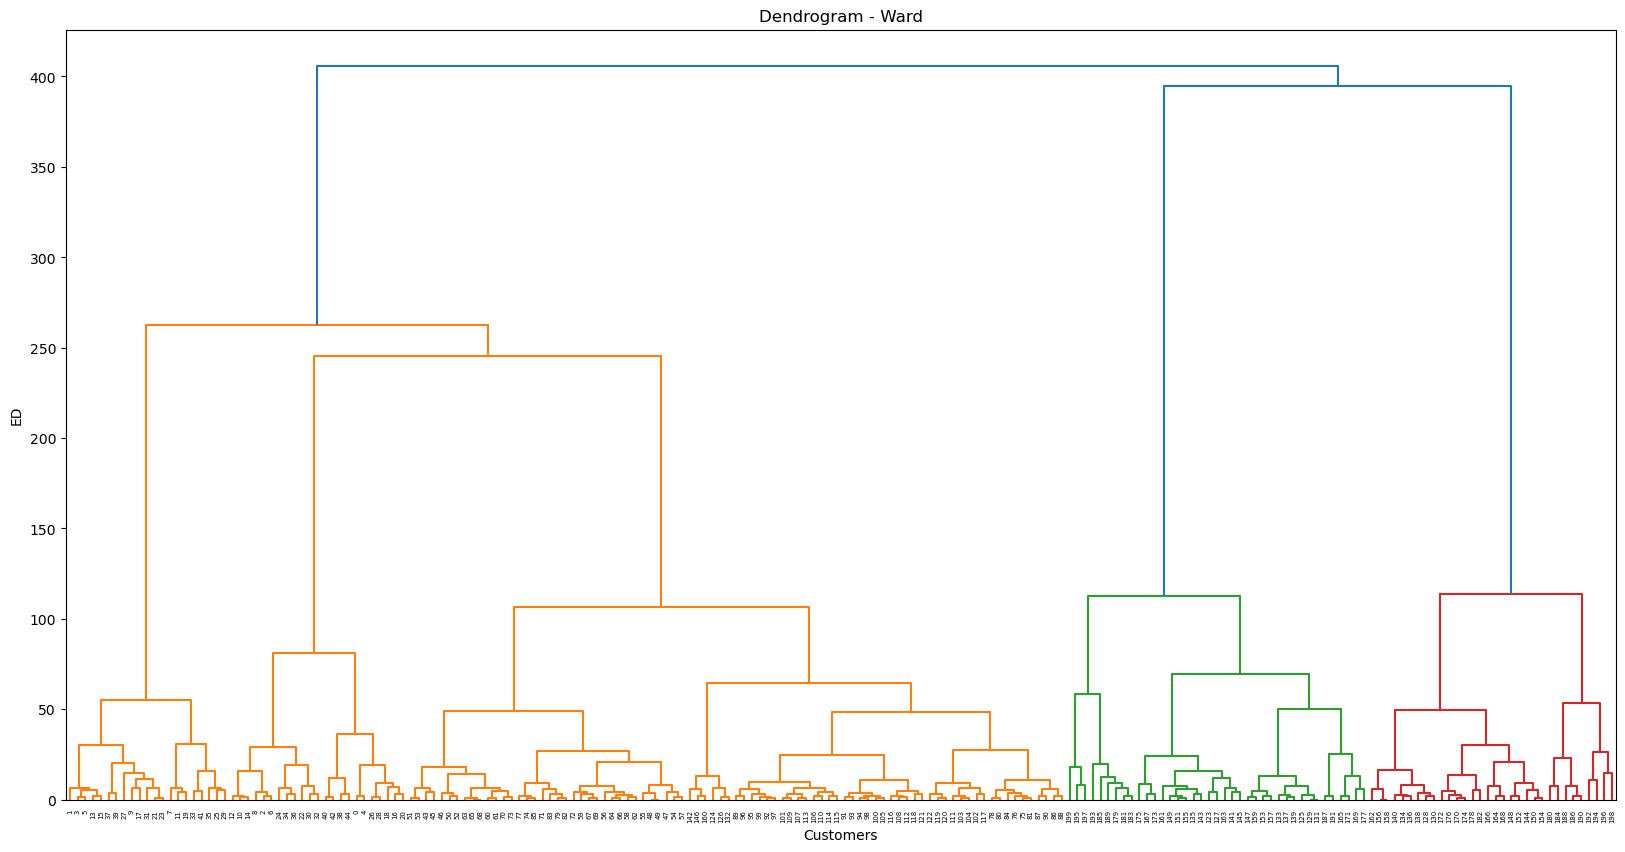

In [13]:
dend=dendrogram(linkage(x,method='ward'))
plt.title('Dendrogram - Ward')
plt.xlabel('Customers')
plt.ylabel('ED')
plt.savefig('Dendrogram Ward.png')
plt.show()

**Fitting the Agglomerative Clustering model with ideal number of clusters found from the Dendrogram using Ward Method and predicting the dataset belonging to the Cluster.**

In [14]:
hc=AgglomerativeClustering(n_clusters=5,linkage='ward')
y_hc=hc.fit_predict(x)

**Plotting the Scatter Plot Graph with the independent variable and the Cluster which it belongs and saving the PNG file.**

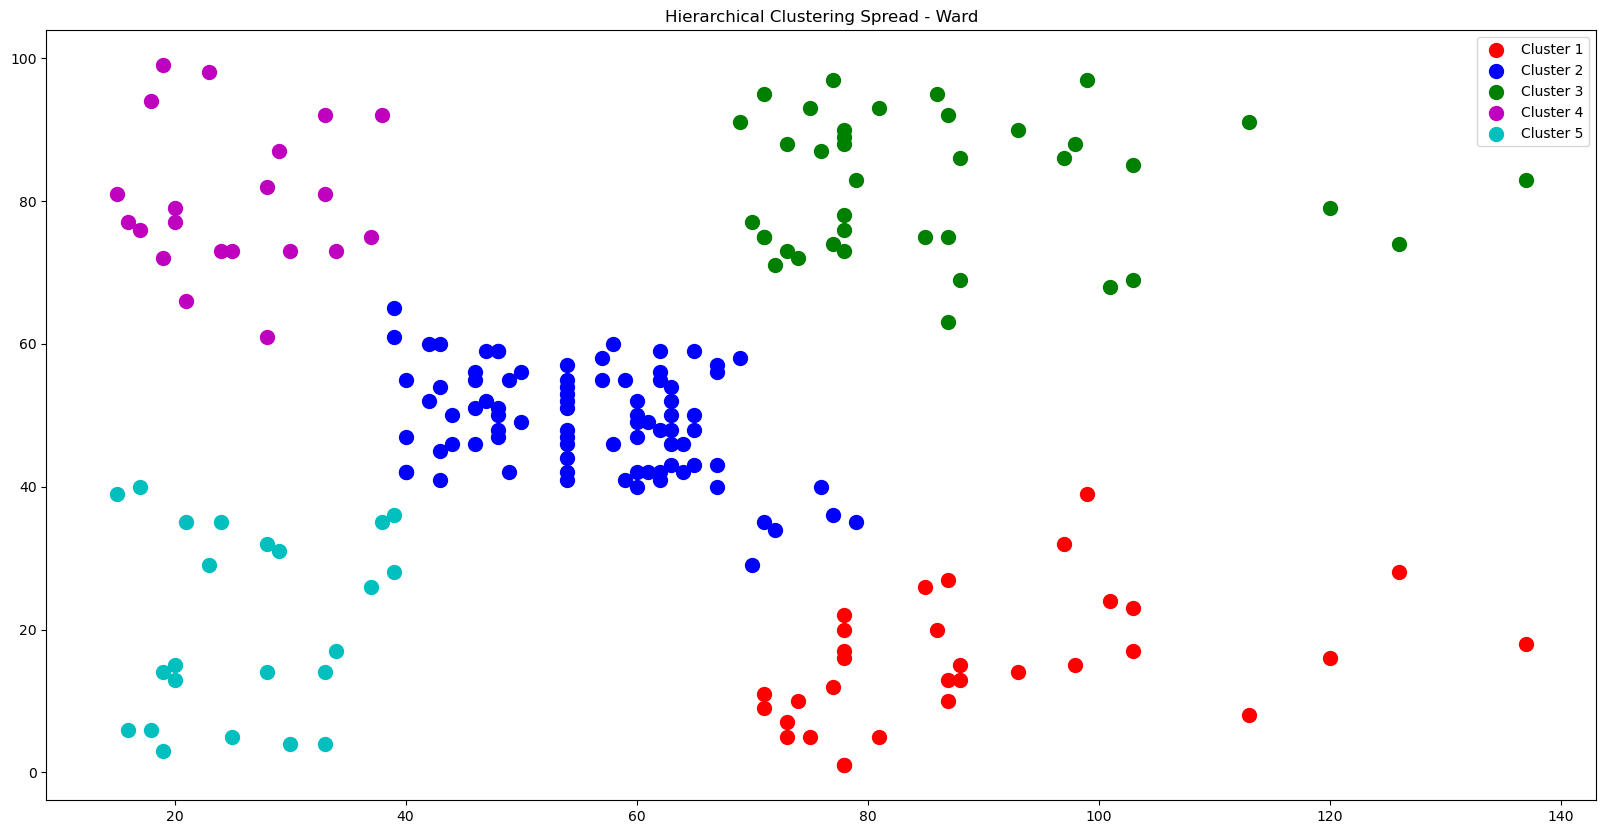

In [15]:
plt.scatter(x[y_hc==0,0],x[y_hc==0,1],c='r',s=100,label='Cluster 1')
plt.scatter(x[y_hc==1,0],x[y_hc==1,1],c='b',s=100,label='Cluster 2')
plt.scatter(x[y_hc==2,0],x[y_hc==2,1],c='g',s=100,label='Cluster 3')
plt.scatter(x[y_hc==3,0],x[y_hc==3,1],c='m',s=100,label='Cluster 4')
plt.scatter(x[y_hc==4,0],x[y_hc==4,1],c='c',s=100,label='Cluster 5')
plt.title('Hierarchical Clustering Spread - Ward')
plt.savefig('Hierarchical Clustering Spread - Ward.png')
plt.legend()
plt.show()

**Merging the Cluster Number and adding the sepearte column for it with Original Dataset and displaying the resulting dataset**

In [16]:
result_hc_ward=pd.concat([df,pd.DataFrame(y_hc,columns=['Cluster Number'])],axis=1)
display(result_hc_ward)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster Number
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,0
197,198,Male,32,126,74,2
198,199,Male,32,137,18,0


**Grouping by the Cluster Number with respect to Annual Income and Spending Score to get the Minimum, Maximum values of Annual Income and Spending Score and the number of values in each Clusters.**

In [17]:
result_hc_ward.groupby('Cluster Number').agg({'Annual Income (k$)':[np.min,np.max],'Spending Score (1-100)':[np.min,np.max,np.size]})

Annual Income (k$)      Spending Score (1-100)          
                             amin amax                   amin amax size
Cluster Number                                                         
0                              71  137                      1   39   32
1                              39   79                     29   65   85
2                              69  137                     63   97   39
3                              15   38                     61   99   21
4                              15   39                      3   40   23

**Plotting the Dendrogram Graph using Single Method to find out the exact ideal number of clusters to be created using Agglomerative Clustering Model with Single Linkage and saving the PNG file**

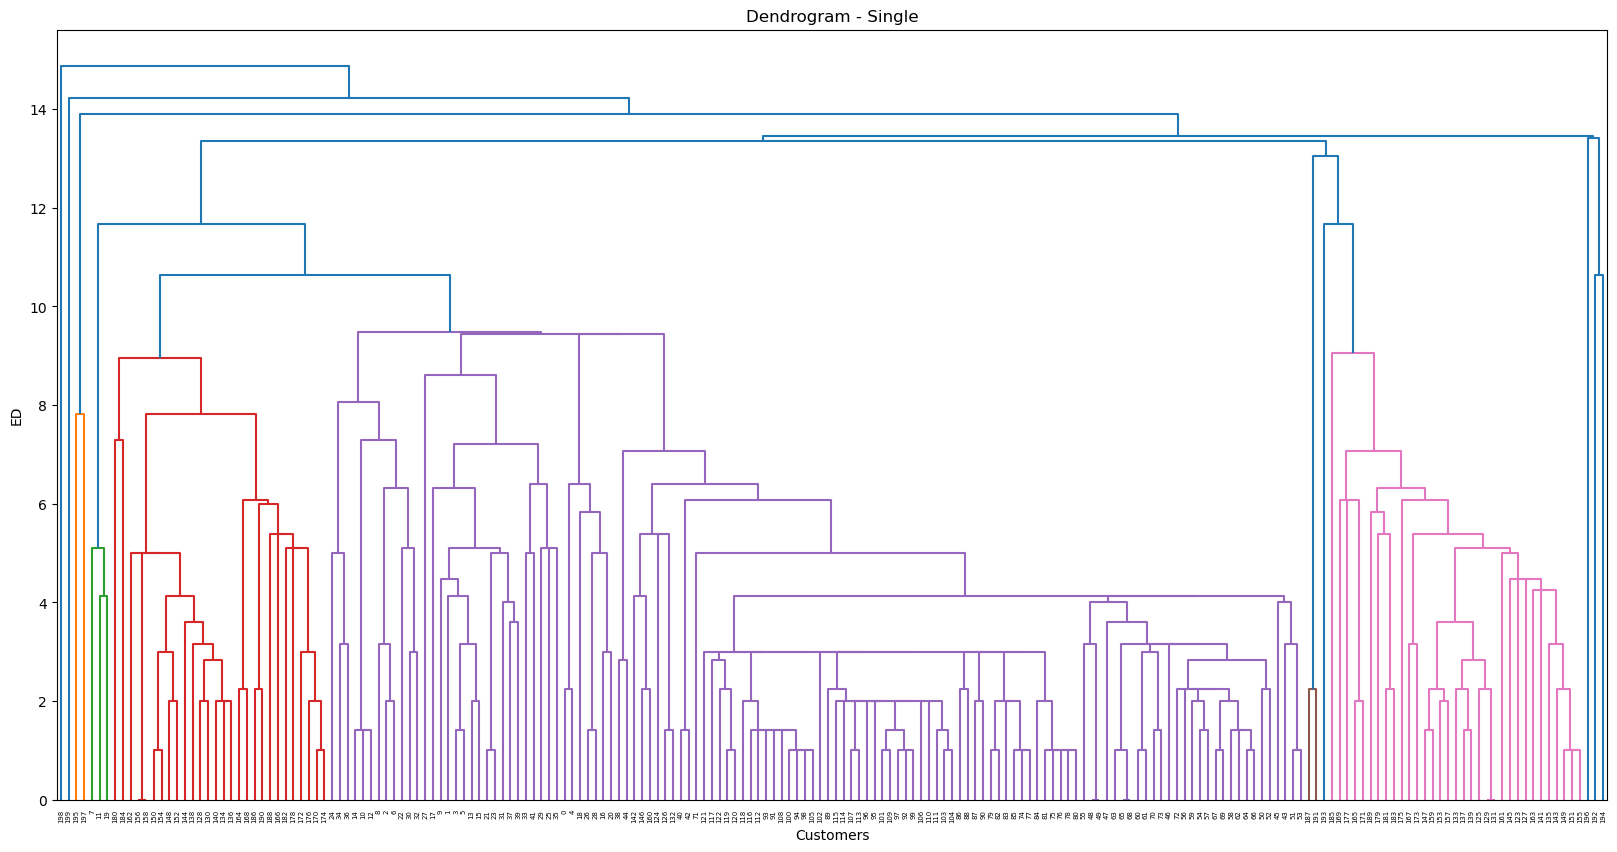

In [18]:
dend=dendrogram(linkage(x,method='single'))
plt.title('Dendrogram - Single')
plt.xlabel('Customers')
plt.ylabel('ED')
plt.savefig('Dendrogram Single.png')
plt.show()

**Fitting the Agglomerative Clustering model with ideal number of clusters found from the Dendrogram using Single Method and predicting the dataset belonging to the Cluster.**

In [19]:
hc1=AgglomerativeClustering(n_clusters=7,linkage='single')
y_hc1=hc1.fit_predict(x)

**Plotting the Scatter Plot Graph with the independent variable and the Cluster which it belongs and saving the PNG file.**

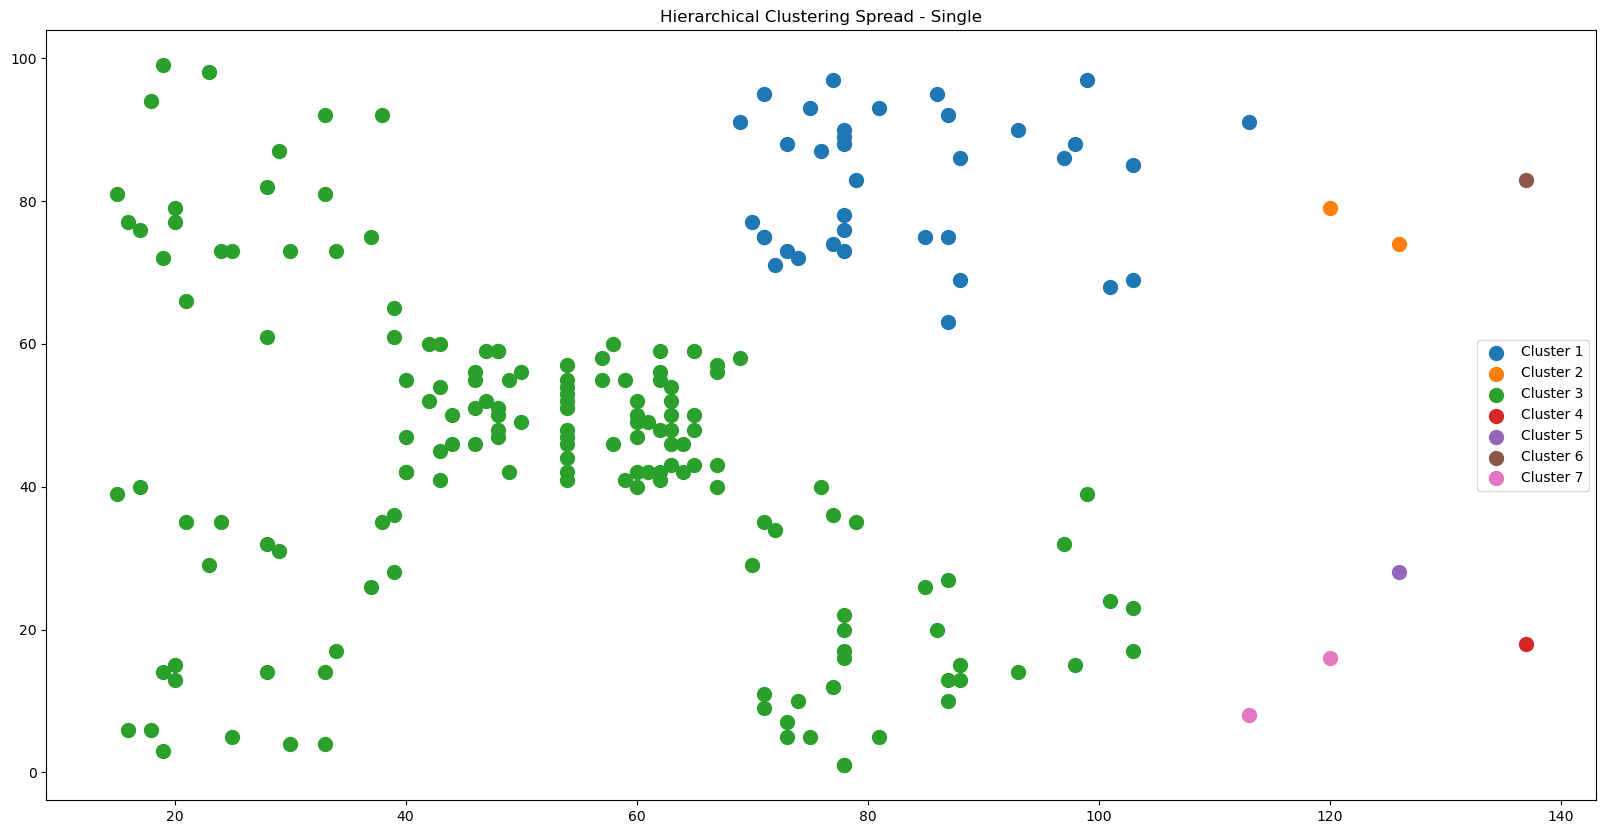

In [20]:
plt.scatter(x[y_hc1==0,0],x[y_hc1==0,1],s=100,label='Cluster 1')
plt.scatter(x[y_hc1==1,0],x[y_hc1==1,1],s=100,label='Cluster 2')
plt.scatter(x[y_hc1==2,0],x[y_hc1==2,1],s=100,label='Cluster 3')
plt.scatter(x[y_hc1==3,0],x[y_hc1==3,1],s=100,label='Cluster 4')
plt.scatter(x[y_hc1==4,0],x[y_hc1==4,1],s=100,label='Cluster 5')
plt.scatter(x[y_hc1==5,0],x[y_hc1==5,1],s=100,label='Cluster 6')
plt.scatter(x[y_hc1==6,0],x[y_hc1==6,1],s=100,label='Cluster 7')
plt.title('Hierarchical Clustering Spread - Single')
plt.savefig('Hierarchical Clustering Spread - Single.png')
plt.legend()
plt.show()

**Merging the Cluster Number and adding the sepearte column for it with Original Dataset and displaying the resulting dataset**

In [21]:
result_hc_single=pd.concat([df,pd.DataFrame(y_hc1,columns=['Cluster Number'])],axis=1)
display(result_hc_single)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster Number
0,1,Male,19,15,39,2
1,2,Male,21,15,81,2
2,3,Female,20,16,6,2
3,4,Female,23,16,77,2
4,5,Female,31,17,40,2
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,4
197,198,Male,32,126,74,1
198,199,Male,32,137,18,3


**Grouping by the Cluster Number with respect to Annual Income and Spending Score to get the Minimum, Maximum values of Annual Income and Spending Score and the number of values in each Clusters.**

In [22]:
result_hc_single.groupby('Cluster Number').agg({'Annual Income (k$)':[np.min,np.max],'Spending Score (1-100)':[np.min,np.max,np.size]})

Annual Income (k$)      Spending Score (1-100)          
                             amin amax                   amin amax size
Cluster Number                                                         
0                              69  113                     63   97   36
1                             120  126                     74   79    2
2                              15  103                      1   99  157
3                             137  137                     18   18    1
4                             126  126                     28   28    1
5                             137  137                     83   83    1
6                             113  120                      8   16    2

**Plotting the Dendrogram Graph using Complete Method to find out the exact ideal number of clusters to be created using Agglomerative Clustering Model with Complete Linkage and saving the PNG file**

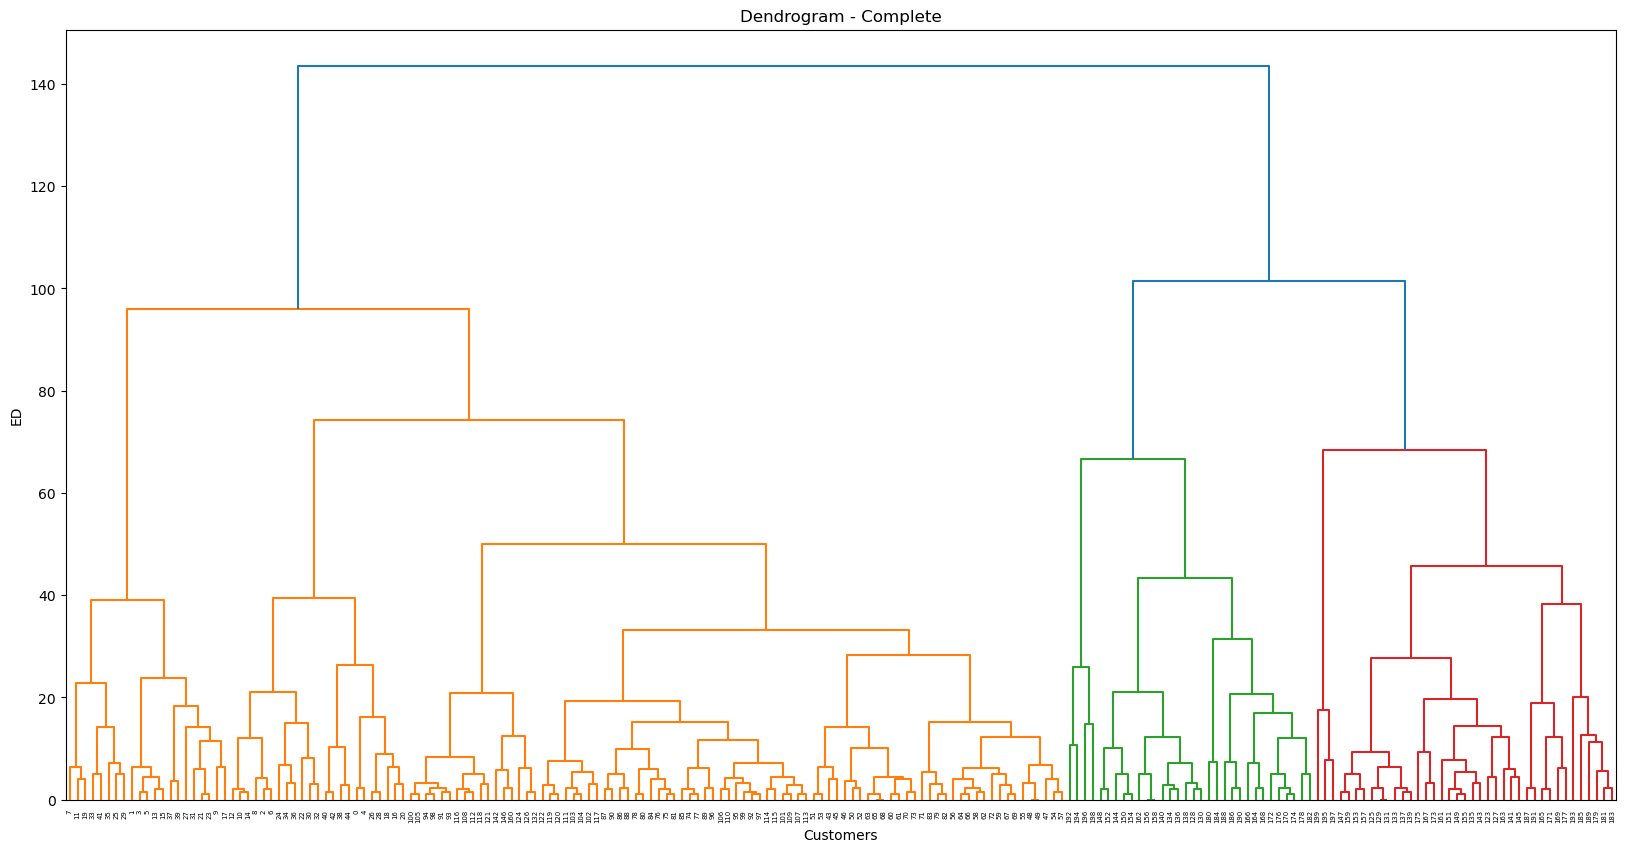

In [23]:
dend=dendrogram(linkage(x,method='complete'))
plt.title('Dendrogram - Complete')
plt.xlabel('Customers')
plt.ylabel('ED')
plt.savefig('Dendrogram Complete.png')
plt.show()

**Fitting the Agglomerative Clustering model with ideal number of clusters found from the Dendrogram using Complete Method and predicting the dataset belonging to the Cluster.**

In [24]:
hc2=AgglomerativeClustering(n_clusters=5,linkage='complete')
y_hc2=hc2.fit_predict(x)

**Plotting the Scatter Plot Graph with the independent variable and the Cluster which it belongs and saving the PNG file.**

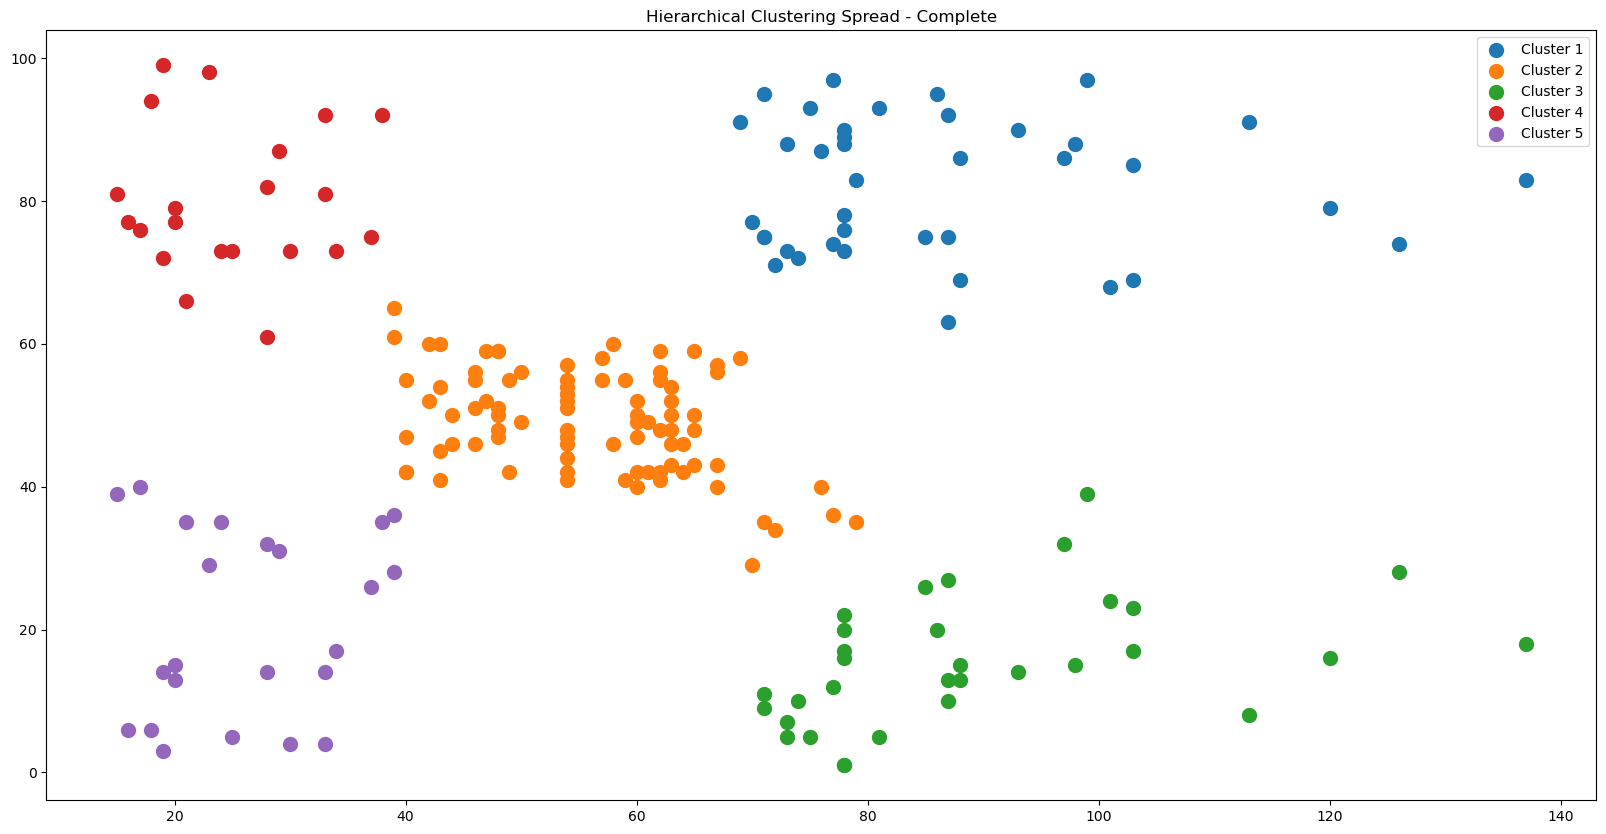

In [25]:
plt.scatter(x[y_hc2==0,0],x[y_hc2==0,1],s=100,label='Cluster 1')
plt.scatter(x[y_hc2==1,0],x[y_hc2==1,1],s=100,label='Cluster 2')
plt.scatter(x[y_hc2==2,0],x[y_hc2==2,1],s=100,label='Cluster 3')
plt.scatter(x[y_hc2==3,0],x[y_hc2==3,1],s=100,label='Cluster 4')
plt.scatter(x[y_hc2==4,0],x[y_hc2==4,1],s=100,label='Cluster 5')
plt.title('Hierarchical Clustering Spread - Complete')
plt.savefig('Hierarchical Clustering Spread - Complete.png')
plt.legend()
plt.show()

**Merging the Cluster Number and adding the sepearte column for it with Original Dataset and displaying the resulting dataset**

In [26]:
result_hc_complete=pd.concat([df,pd.DataFrame(y_hc2,columns=['Cluster Number'])],axis=1)
display(result_hc_complete)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster Number
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,0
196,197,Female,45,126,28,2
197,198,Male,32,126,74,0
198,199,Male,32,137,18,2


**Grouping by the Cluster Number with respect to Annual Income and Spending Score to get the Minimum, Maximum values of Annual Income and Spending Score and the number of values in each Clusters.**

In [27]:
result_hc_complete.groupby('Cluster Number').agg({'Annual Income (k$)':[np.min,np.max],'Spending Score (1-100)':[np.min,np.max,np.size]})

Annual Income (k$)      Spending Score (1-100)          
                             amin amax                   amin amax size
Cluster Number                                                         
0                              69  137                     63   97   39
1                              39   79                     29   65   85
2                              71  137                      1   39   32
3                              15   38                     61   99   21
4                              15   39                      3   40   23

**Plotting the Dendrogram Graph using Average Method to find out the exact ideal number of clusters to be created using Agglomerative Clustering Model with Average Linkage and saving the PNG file**

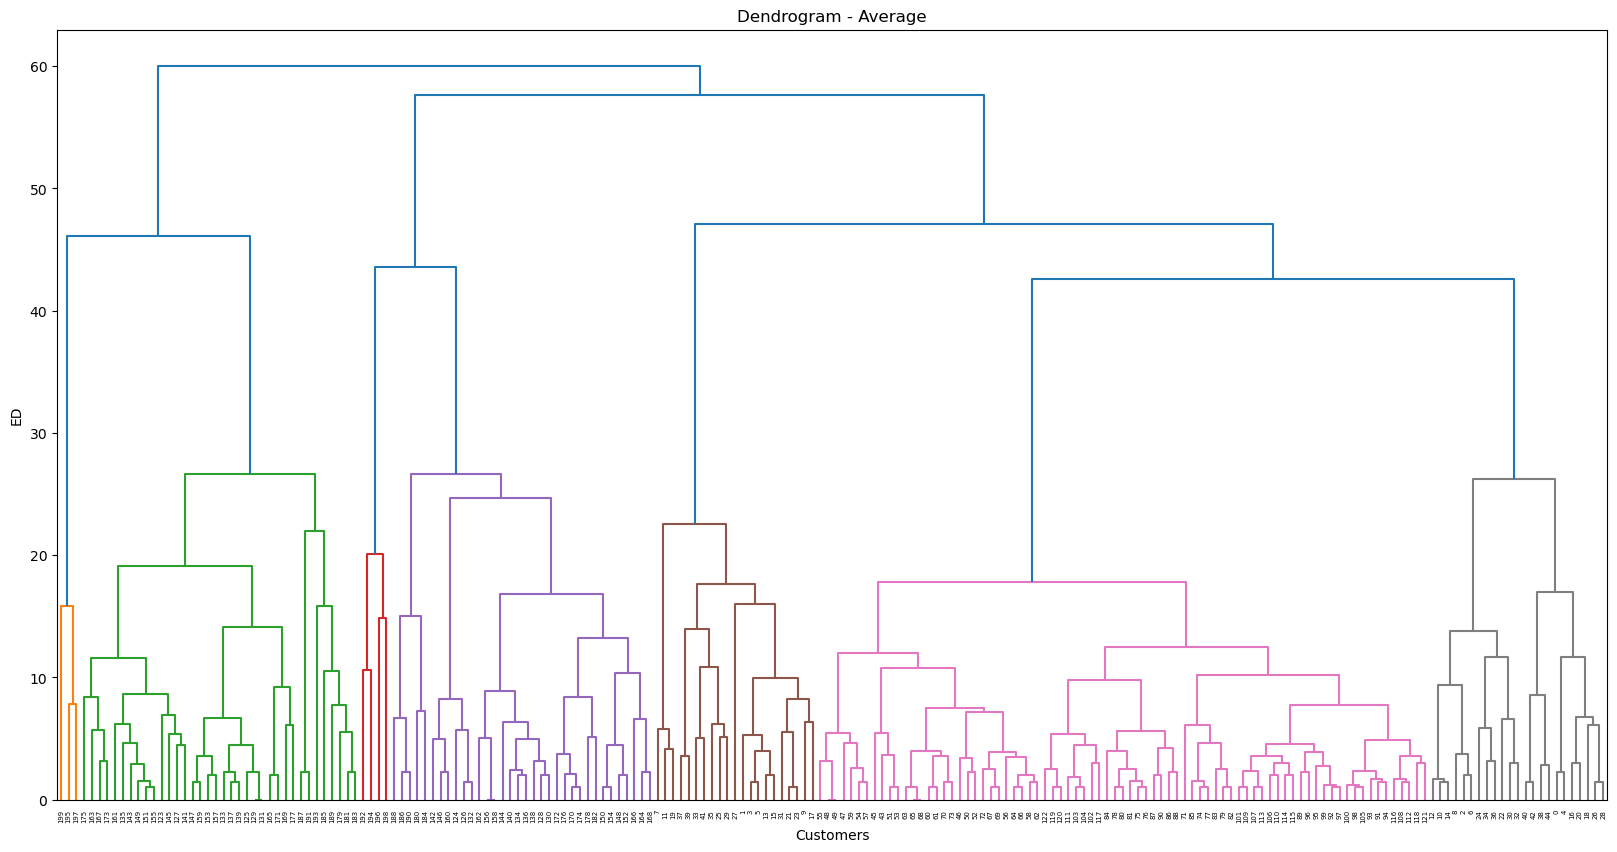

In [28]:
dend=dendrogram(linkage(x,method='average'))
plt.title('Dendrogram - Average')
plt.xlabel('Customers')
plt.ylabel('ED')
plt.savefig('Dendrogram Average.png')
plt.show()

**Fitting the Agglomerative Clustering model with ideal number of clusters found from the Dendrogram using Average Method and predicting the dataset belonging to the Cluster.**

In [29]:
hc3=AgglomerativeClustering(n_clusters=7,linkage='average')
y_hc3=hc3.fit_predict(x)

**Plotting the Scatter Plot Graph with the independent variable and the Cluster which it belongs and saving the PNG file.**

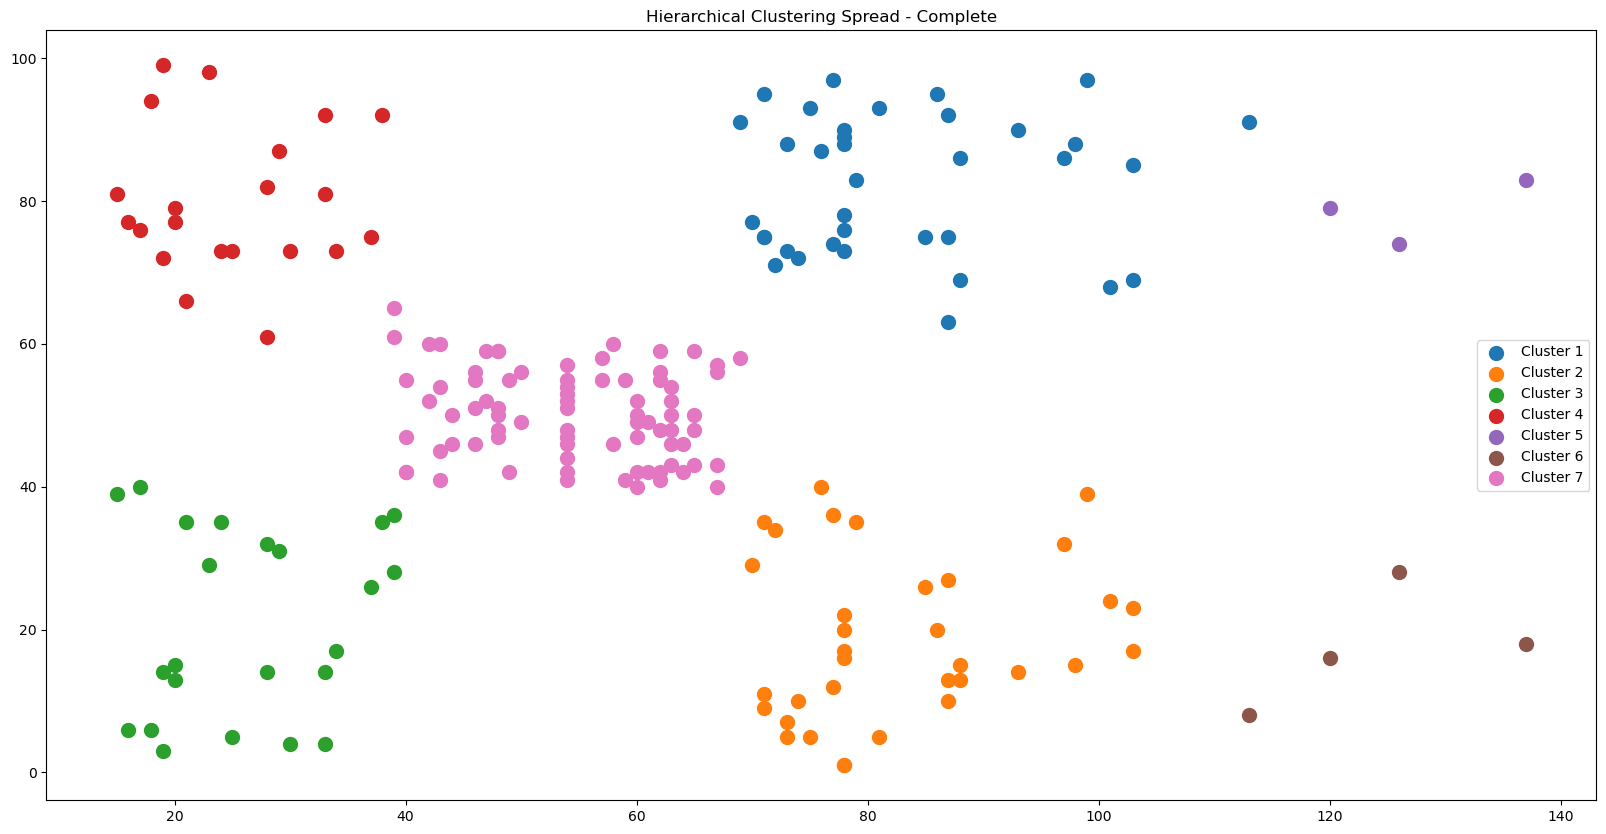

In [30]:
plt.scatter(x[y_hc3==0,0],x[y_hc3==0,1],s=100,label='Cluster 1')
plt.scatter(x[y_hc3==1,0],x[y_hc3==1,1],s=100,label='Cluster 2')
plt.scatter(x[y_hc3==2,0],x[y_hc3==2,1],s=100,label='Cluster 3')
plt.scatter(x[y_hc3==3,0],x[y_hc3==3,1],s=100,label='Cluster 4')
plt.scatter(x[y_hc3==4,0],x[y_hc3==4,1],s=100,label='Cluster 5')
plt.scatter(x[y_hc3==5,0],x[y_hc3==5,1],s=100,label='Cluster 6')
plt.scatter(x[y_hc3==6,0],x[y_hc3==6,1],s=100,label='Cluster 7')
plt.title('Hierarchical Clustering Spread - Complete')
plt.savefig('Hierarchical Clustering Spread - Complete.png')
plt.legend()
plt.show()

**Merging the Cluster Number and adding the sepearte column for it with Original Dataset and displaying the resulting dataset**

In [31]:
result_hc_average=pd.concat([df,pd.DataFrame(y_hc3,columns=['Cluster Number'])],axis=1)
display(result_hc_average)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster Number
0,1,Male,19,15,39,2
1,2,Male,21,15,81,3
2,3,Female,20,16,6,2
3,4,Female,23,16,77,3
4,5,Female,31,17,40,2
...,...,...,...,...,...,...
195,196,Female,35,120,79,4
196,197,Female,45,126,28,5
197,198,Male,32,126,74,4
198,199,Male,32,137,18,5


**Grouping by the Cluster Number with respect to Annual Income and Spending Score to get the Minimum, Maximum values of Annual Income and Spending Score and the number of values in each Clusters.**

In [32]:
result_hc_average.groupby('Cluster Number').agg({'Annual Income (k$)':[np.min,np.max],'Spending Score (1-100)':[np.min,np.max,np.size]})

Annual Income (k$)      Spending Score (1-100)          
                             amin amax                   amin amax size
Cluster Number                                                         
0                              69  113                     63   97   36
1                              70  103                      1   40   34
2                              15   39                      3   40   23
3                              15   38                     61   99   21
4                             120  137                     74   83    3
5                             113  137                      8   28    4
6                              39   69                     40   65   79